# 4.11 来自投影的图像重建

## radon

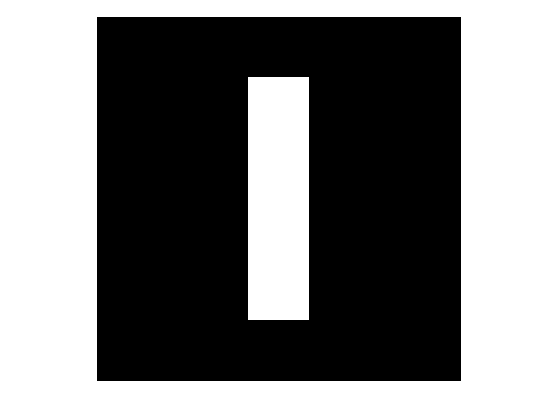

In [8]:
g1 = zeros(600, 600);
g1(100:500, 250:350) = 1;
g2 = phantom('Modified Shepp-Logan', 600);

theta = 0:0.5:179.5;
[R1, xp1] = radon(g1, theta);
[R2, xp2] = radon(g2, theta);

R1 = flipud(R1');
R2 = flipud(R2');

imshow(g1)

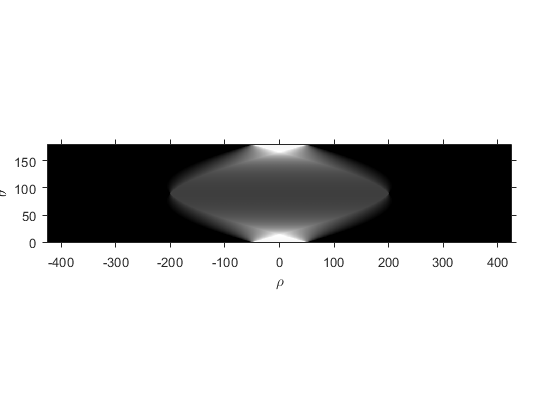

In [10]:
imshow(R1, [], 'XData', xp1([1 end]), 'YData', [179.5 0])
axis xy
axis on
xlabel('\rho'), ylabel('\theta')

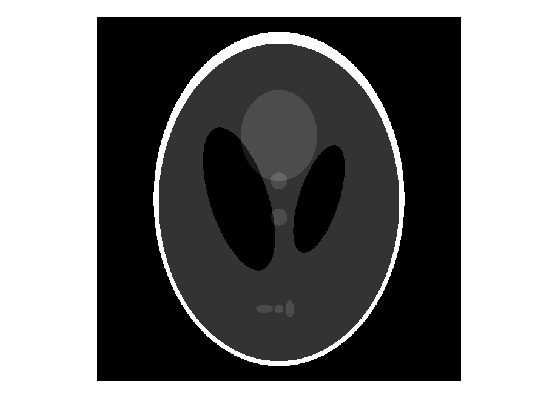

In [11]:
imshow(g2)

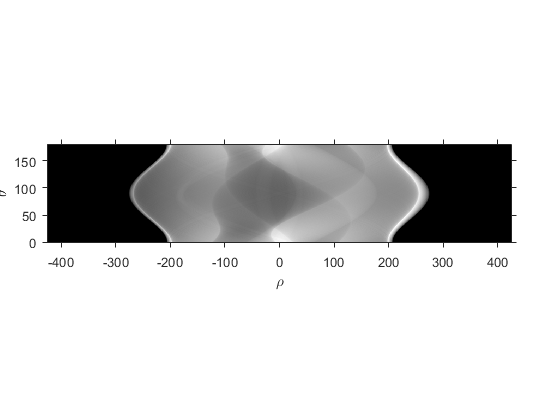

In [13]:
imshow(R2, [], 'XData', xp2([1 end]), 'YData', [179.5 0])
axis xy
axis on
xlabel('\rho'), ylabel('\theta')

## iradon

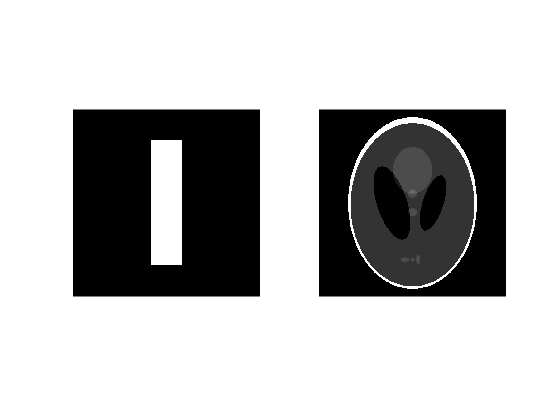

In [3]:
g1 = zeros(600, 600);
g1(100:500, 250:350) = 1;
g2 = phantom('Modified Shepp-Logan', 600);

theta = 0:0.5:179.5;
R1 = radon(g1, theta);
R2 = radon(g2, theta);

f1 = iradon(R1, theta, 'none');
f2 = iradon(R2, theta, 'none');

subplot(121), imshow(g1)
subplot(122), imshow(g2)

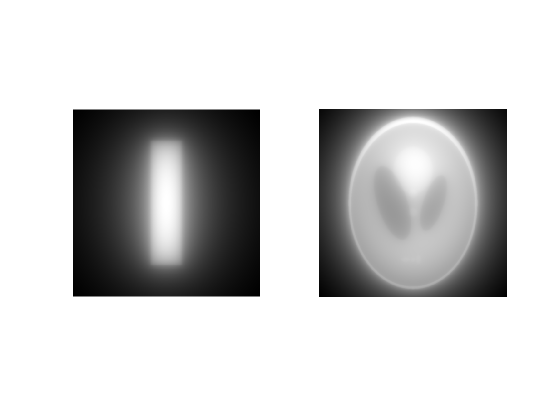

In [5]:
subplot(121), imshow(f1, [])
subplot(122), imshow(f2, [])

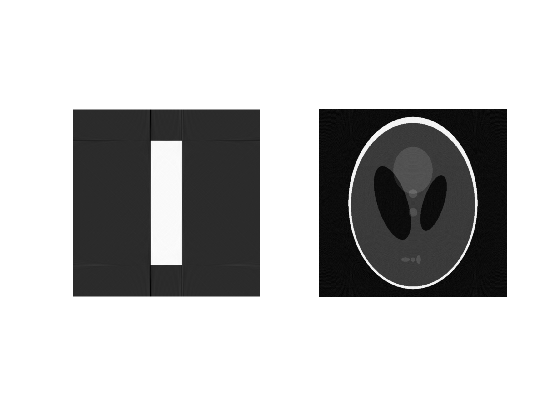

In [6]:
f1_ram = iradon(R1, theta);
f2_ram = iradon(R2, theta);
subplot(121), imshow(f1_ram, [])
subplot(122), imshow(f2_ram, [])

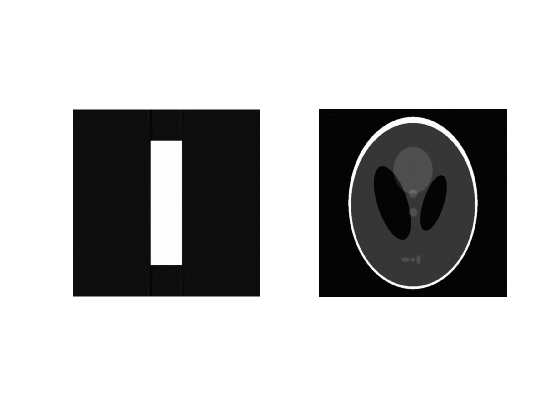

In [7]:
f1_hamm = iradon(R1, theta, 'Hamming');
f2_hamm = iradon(R2, theta, 'Hamming');
subplot(121), imshow(f1_hamm, [])
subplot(122), imshow(f2_hamm, [])

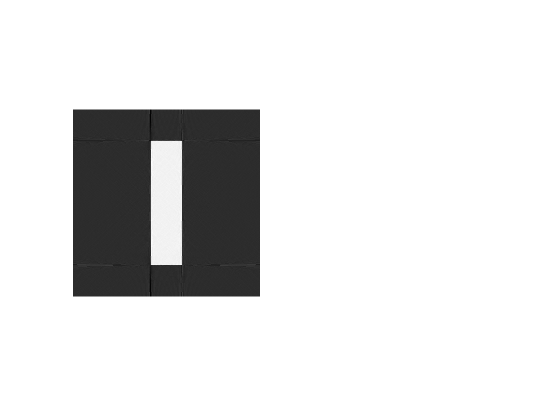

In [19]:
f1_near = iradon(R1, theta, 'nearest');
f1_lin = iradon(R1, theta, 'linear');
f1_cub = iradon(R1, theta, 'cubic');
subplot(121), imshow(f1_near, []);
% subplot(122), improfile(f1_near);

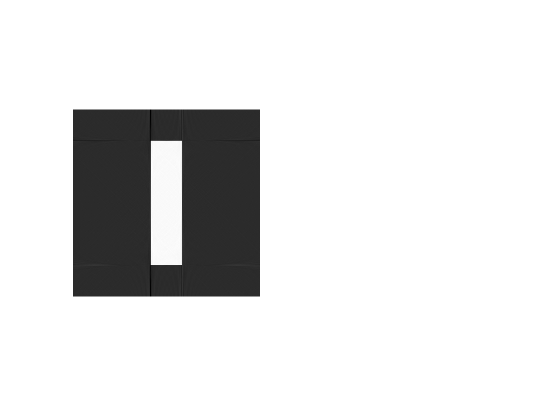

In [14]:
subplot(121), imshow(f1_lin, []);

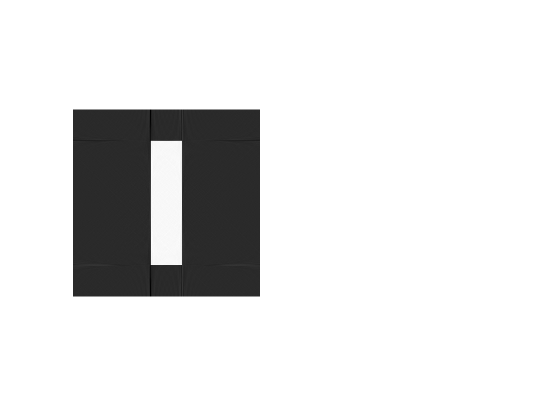

In [15]:
subplot(121), imshow(f1_cub, [])

## fanbeam

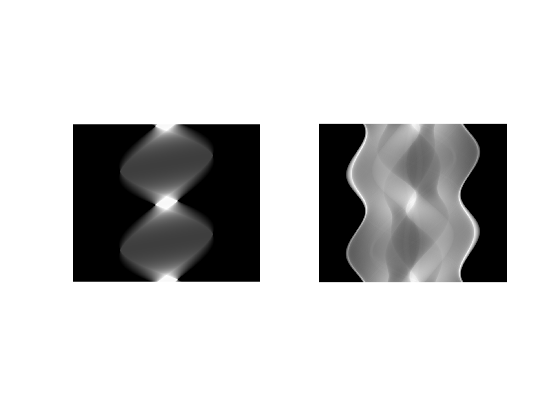

In [24]:
g1 = zeros(600, 600);
g1(100:500, 250:350) = 1;
g2 = phantom('Modified Shepp-Logan', 600);

D = 1.5 * hypot(size(g1, 1), size(g1, 2)) / 2;
B1_line = fanbeam(g1, D, 'FanSensorGeometry', 'line', ... 
            'FanSensorSpacing', 1, 'FanRotationIncrement', 0.5);
B1_line = flipud(B1_line');

B2_line = fanbeam(g2, D, 'FanSensorGeometry', 'line', ... 
            'FanSensorSpacing', 1, 'FanRotationIncrement', 0.5);
B2_line = flipud(B2_line');
subplot(121), imshow(B1_line, [])
subplot(122), imshow(B2_line, [])

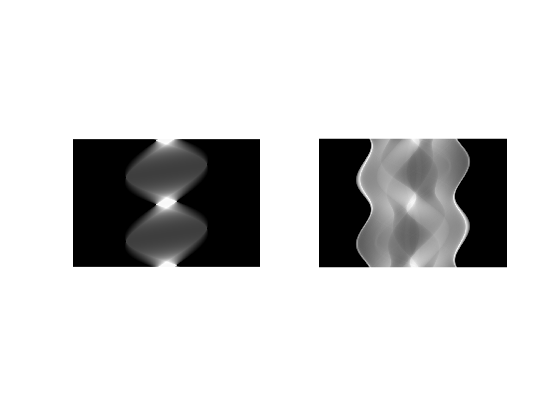

In [25]:
B1_arc = fanbeam(g1, D, 'FanSensorGeometry', 'arc', ... 
            'FanSensorSpacing', 0.08, 'FanRotationIncrement', 0.5);
B2_arc = fanbeam(g2, D, 'FanSensorGeometry', 'arc', ... 
            'FanSensorSpacing', 0.08, 'FanRotationIncrement', 0.5);
subplot(121), imshow(flipud(B1_arc'), [])
subplot(122), imshow(flipud(B2_arc'), [])

## ifanbeam

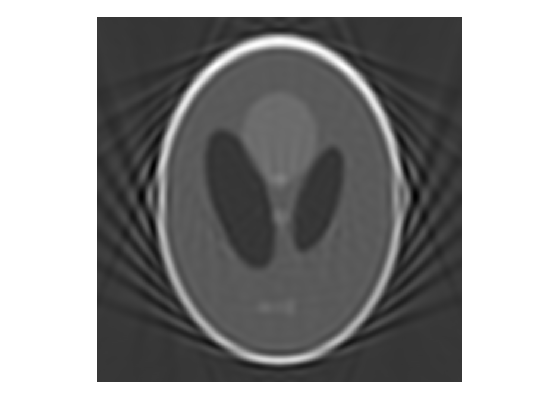

In [26]:
g = phantom('Modified Shepp-Logan', 600);
D = 1.5 * hypot(size(g, 1), size(g, 2)) / 2;
B1 = fanbeam(g, D);
f1 = ifanbeam(B1, D);
imshow(f1, [])

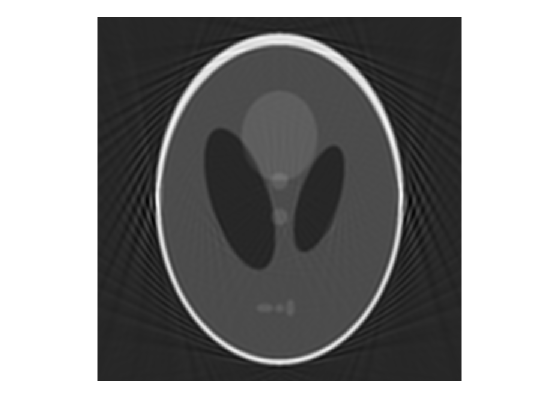

In [27]:
B2 = fanbeam(g, D, 'FanRotationIncrement', 0.5, ...
            'FanSensorSpacing', 0.5);
f2 = ifanbeam(B2, D, 'FanRotationIncrement', 0.5, ...
            'FanSensorSpacing', 0.5, 'Filter', 'Hamming');
imshow(f2, [])

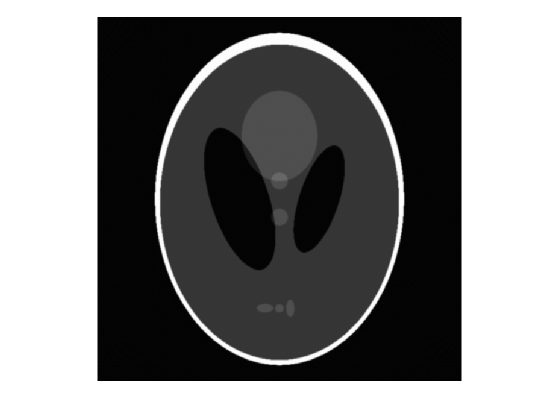

In [29]:
B3 = fanbeam(g, D, 'FanRotationIncrement', 0.5, ...
            'FanSensorSpacing', 0.05);
f3 = ifanbeam(B3, D, 'FanRotationIncrement', 0.5, ...
            'FanSensorSpacing', 0.05, 'Filter', 'Hamming');
imshow(f3, [])

## fan2para

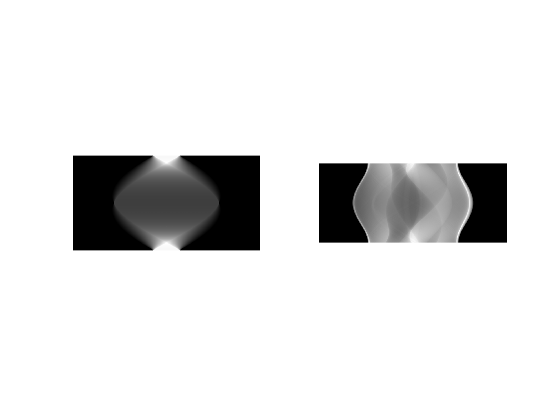

In [31]:
g1 = zeros(600, 600);
g1(100:500, 250:350) = 1;
g2 = phantom('Modified Shepp-Logan', 600);

D = 1.5 * hypot(size(g1, 1), size(g1, 2)) / 2;
B1_line = fanbeam(g1, D, 'FanSensorGeometry', 'line', ... 
            'FanSensorSpacing', 1, 'FanRotationIncrement', 0.5);
B1_arc = fanbeam(g2, D, 'FanSensorGeometry', 'arc', ... 
            'FanSensorSpacing', 0.08, 'FanRotationIncrement', 0.5);
P1_line = fan2para(B1_line, D, 'FanRotationIncrement', 0.5, ...
                    'FanSensorGeometry', 'line', ...
                    'FanSensorSpacing', 1, ...
                    'ParallelCoverage', 'halfcycle', ...
                    'ParallelRotationIncrement', 0.5, ...
                    'ParallelSensorSpacing', 1);
P2_arc = fan2para(B2_arc, D, 'FanRotationIncrement', 0.5, ...
                'FanSensorGeometry', 'arc', ...
                'FanSensorSpacing', 0.08, ...
                'ParallelCoverage', 'halfcycle', ...
                'ParallelRotationIncrement', 0.5, ...
                'ParallelSensorSpacing', 1);
P1_line = flipud(P1_line');
P2_arc = flipud(P2_arc');
subplot(121), imshow(P1_line, []);
subplot(122), imshow(P2_arc, []);